In [27]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils import Bunch
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [16]:
NDArrayFloat = NDArray[np.float_]
NDArrayInt = NDArray[np.int_]
NDArrayBool = NDArray[np.bool_]

# Exercise - 10
The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function. Then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [2]:
olivettie: Bunch = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
print(olivettie.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [4]:
X, y = olivettie['data'], olivettie['target']

In [13]:
X

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [5]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [6]:
sss = StratifiedShuffleSplit(n_splits= 1, test_size= 40, random_state= 42)
train_index, test_index = sss.split(X, y).__next__()

X_train, y_train = X[train_index], y[train_index]
X_test, y_test = X[test_index], y[test_index]

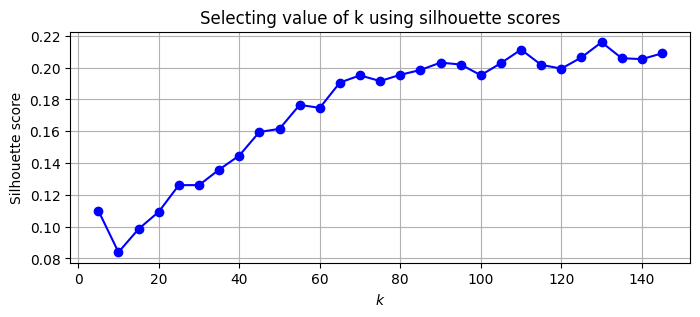

In [7]:
kmeans_per_k: list[KMeans] = [
    KMeans(n_clusters= k, n_init= 10, random_state= 42).fit(X_train) 
    for k in range(5, 150, 5)
]
silhouette_scores: list[float] = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k]
    
plt.figure(figsize= (8, 3))

plt.plot(range(5, 150, 5), silhouette_scores, 'b-', marker= 'o')

plt.grid()
plt.title('Selecting value of k using silhouette scores')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.show()

In [8]:
best_kmeans: KMeans = kmeans_per_k[np.argmax(silhouette_scores)]

Cluster 0


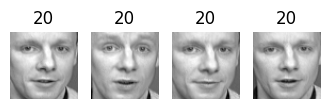

Cluster 1


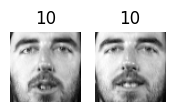

Cluster 2


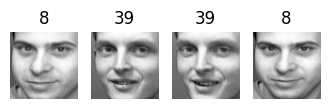

Cluster 3


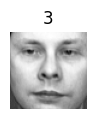

Cluster 4


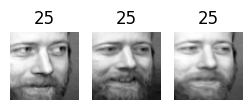

Cluster 5


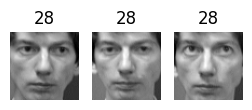

Cluster 6


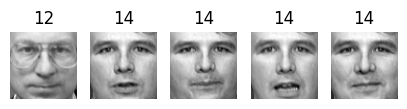

Cluster 7


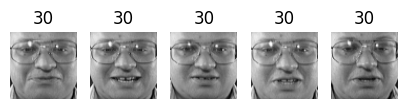

Cluster 8


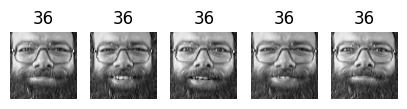

Cluster 9


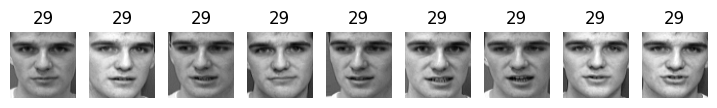

Cluster 10


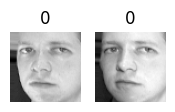

Cluster 11


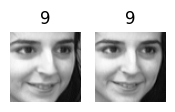

Cluster 12


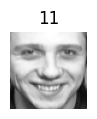

Cluster 13


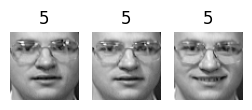

Cluster 14


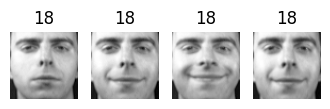

Cluster 15


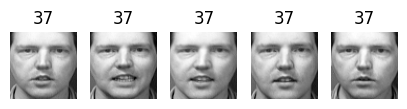

Cluster 16


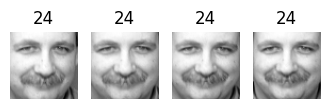

Cluster 17


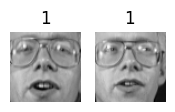

Cluster 18


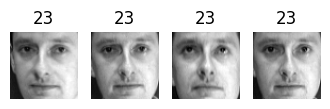

Cluster 19


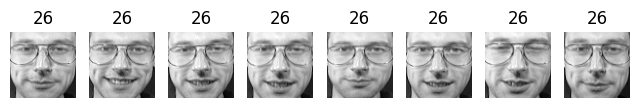

Cluster 20


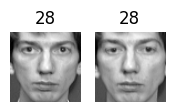

Cluster 21


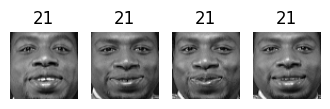

Cluster 22


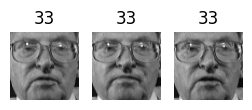

Cluster 23


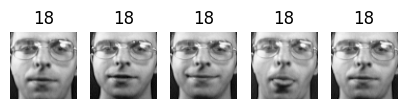

Cluster 24


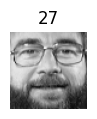

Cluster 25


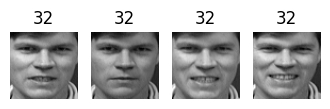

Cluster 26


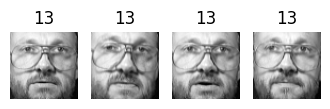

Cluster 27


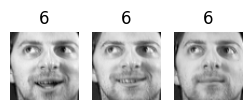

Cluster 28


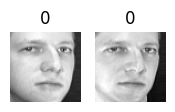

Cluster 29


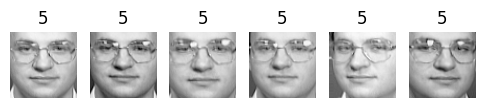

Cluster 30


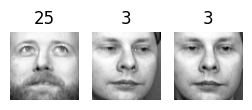

Cluster 31


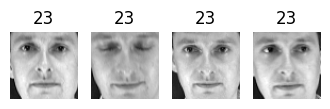

Cluster 32


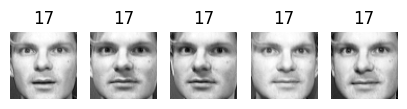

Cluster 33


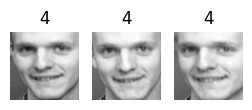

Cluster 34


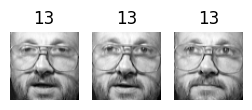

Cluster 35


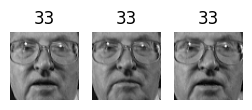

Cluster 36


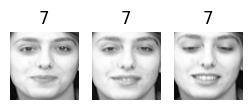

Cluster 37


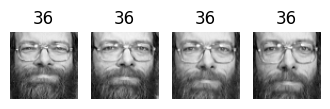

Cluster 38


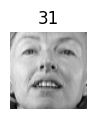

Cluster 39


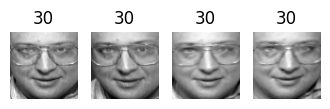

Cluster 40


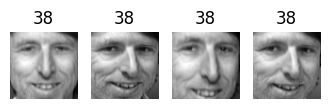

Cluster 41


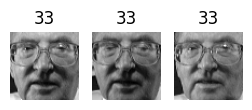

Cluster 42


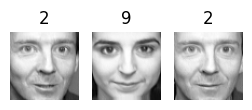

Cluster 43


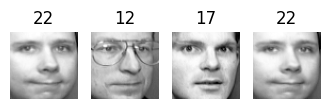

Cluster 44


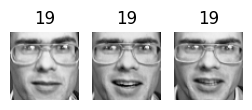

Cluster 45


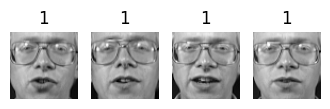

Cluster 46


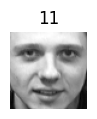

Cluster 47


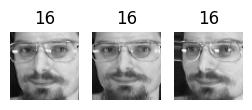

Cluster 48


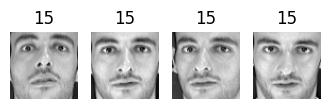

Cluster 49


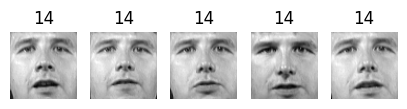

Cluster 50


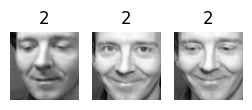

Cluster 51


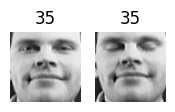

Cluster 52


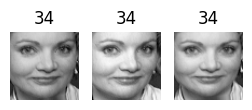

Cluster 53


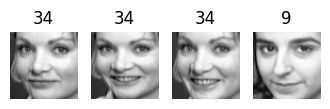

Cluster 54


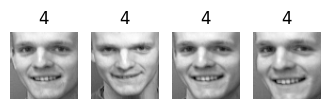

Cluster 55


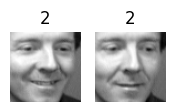

Cluster 56


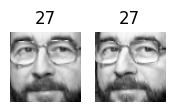

Cluster 57


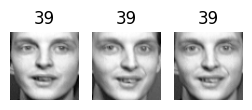

Cluster 58


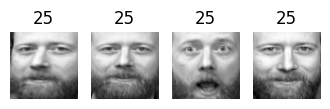

Cluster 59


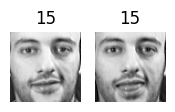

Cluster 60


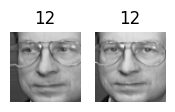

Cluster 61


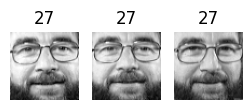

Cluster 62


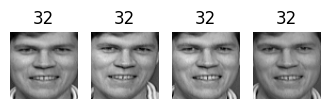

Cluster 63


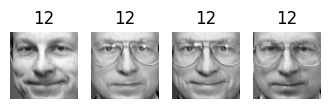

Cluster 64


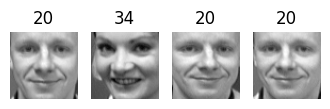

Cluster 65


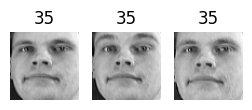

Cluster 66


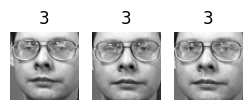

Cluster 67


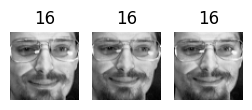

Cluster 68


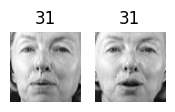

Cluster 69


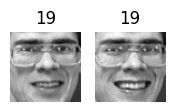

Cluster 70


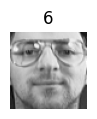

Cluster 71


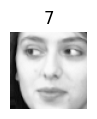

Cluster 72


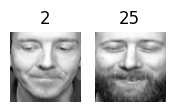

Cluster 73


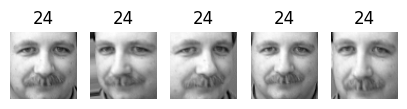

Cluster 74


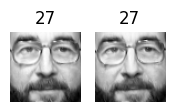

Cluster 75


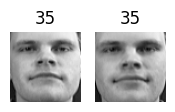

Cluster 76


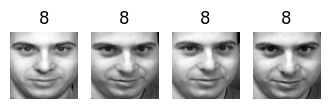

Cluster 77


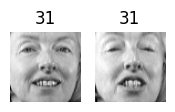

Cluster 78


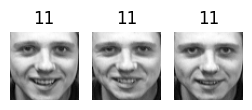

Cluster 79


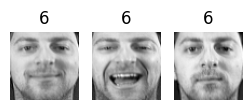

Cluster 80


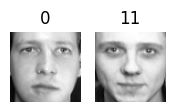

Cluster 81


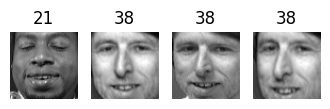

Cluster 82


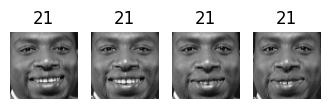

Cluster 83


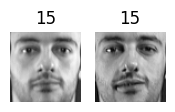

Cluster 84


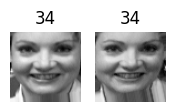

Cluster 85


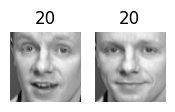

Cluster 86


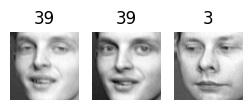

Cluster 87


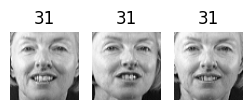

Cluster 88


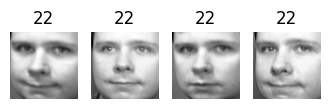

Cluster 89


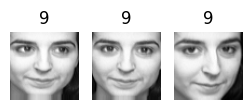

Cluster 90


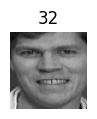

Cluster 91


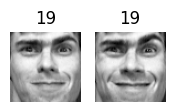

Cluster 92


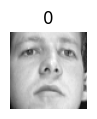

Cluster 93


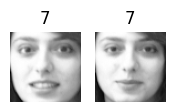

Cluster 94


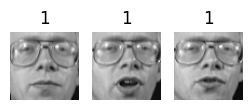

Cluster 95


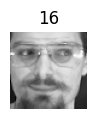

Cluster 96


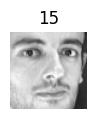

Cluster 97


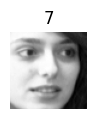

Cluster 98


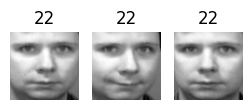

Cluster 99


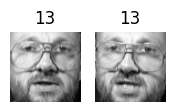

Cluster 100


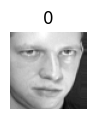

Cluster 101


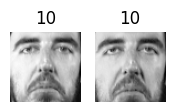

Cluster 102


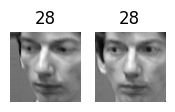

Cluster 103


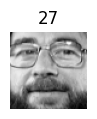

Cluster 104


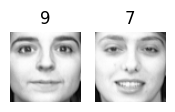

Cluster 105


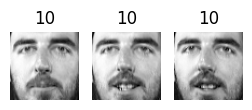

Cluster 106


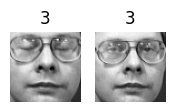

Cluster 107


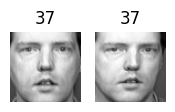

Cluster 108


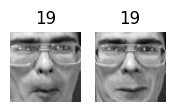

Cluster 109


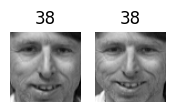

Cluster 110


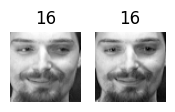

Cluster 111


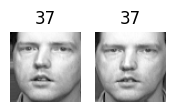

Cluster 112


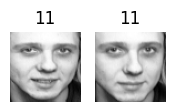

Cluster 113


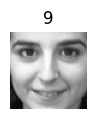

Cluster 114


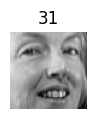

Cluster 115


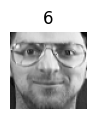

Cluster 116


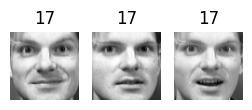

Cluster 117


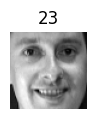

Cluster 118


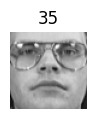

Cluster 119


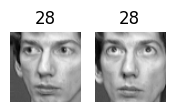

Cluster 120


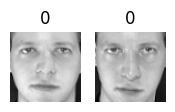

Cluster 121


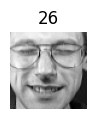

Cluster 122


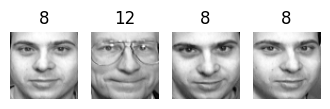

Cluster 123


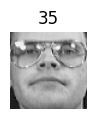

Cluster 124


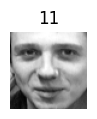

Cluster 125


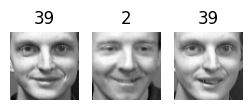

Cluster 126


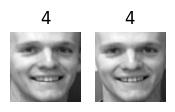

Cluster 127


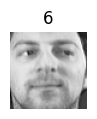

Cluster 128


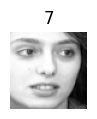

Cluster 129


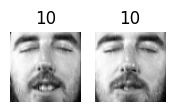

In [19]:
def plot_faces(faces: NDArrayFloat, labels: NDArrayInt) -> None:
    # reshaping each face image from a flattened array to a 2D array of shape (64, 64)
    faces = faces.reshape(-1, 64, 64)
    
    # setting rows and columns for subplots and also size of figure
    n_rows: int = 1
    n_cols: int = faces.shape[0]
        
    plt.figure(figsize= (n_cols, n_rows))
    
    for index, (face, label) in enumerate(zip(faces, labels), start= 1):
        plt.subplot(n_rows, n_cols, index)
        plt.imshow(face, cmap= 'gray')
        plt.axis('off')
        plt.title(label)
        
    plt.show()

for cluster_id in np.unique(best_kmeans.labels_):
    print('Cluster', cluster_id)
    in_cluster: NDArrayBool = best_kmeans.labels_ == cluster_id
    faces: NDArrayFloat = X_train[in_cluster]
    labels: NDArrayInt = y_train[in_cluster]
    plot_faces(faces, labels)

# Exercise - 11
Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)? 

In [21]:
rnd_clf = RandomForestClassifier(n_jobs= -1, random_state= 42)
rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_test, y_test)

0.95

In [22]:
X_train_reduced: NDArrayFloat = best_kmeans.transform(X_train)
X_test_reduced: NDArrayFloat = best_kmeans.transform(X_test)    

In [23]:
rnd_clf = RandomForestClassifier(n_jobs= -1, random_state= 42)
rnd_clf.fit(X_train_reduced, y_train)
rnd_clf.score(X_test_reduced, y_test)

0.85

That is worse than before.

In [25]:
for k in range(5, 150, 5):
    pipeline = make_pipeline(
        KMeans(n_clusters= k, n_init= 10, random_state= 42),
        RandomForestClassifier(random_state= 42)
    )
    
    pipeline.fit(X_train, y_train)
    print(f'{k = }, score = {pipeline.score(X_test, y_test)}')

k = 5, score = 0.525
k = 10, score = 0.7
k = 15, score = 0.75
k = 20, score = 0.725
k = 25, score = 0.675
k = 30, score = 0.725
k = 35, score = 0.725
k = 40, score = 0.725
k = 45, score = 0.775
k = 50, score = 0.725
k = 55, score = 0.75
k = 60, score = 0.725
k = 65, score = 0.775
k = 70, score = 0.75
k = 75, score = 0.825
k = 80, score = 0.85
k = 85, score = 0.85
k = 90, score = 0.825
k = 95, score = 0.85
k = 100, score = 0.825
k = 105, score = 0.85
k = 110, score = 0.775
k = 115, score = 0.825
k = 120, score = 0.85
k = 125, score = 0.825
k = 130, score = 0.85
k = 135, score = 0.85
k = 140, score = 0.825
k = 145, score = 0.85


Still cannot reach or surpass the original score

In [26]:
X_train_extended: NDArrayFloat = np.c_[X_train, X_train_reduced]
X_test_extended: NDArrayFloat = np.c_[X_test, X_test_reduced]  
    
rnd_clf = RandomForestClassifier(n_jobs= -1, random_state= 42)
rnd_clf.fit(X_train_extended, y_train)
rnd_clf.score(X_test_extended, y_test)

0.95

Did all this for nothing

# Exercise - 12
Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies). 

In [33]:
pca = PCA(0.99, random_state= 42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [34]:
pca.n_components_

242

In [35]:
gmm = GaussianMixture(n_components= 40, random_state= 42)
gmm.fit(X_train_pca)

GaussianMixture(n_components=40, random_state=42)

In [36]:
generated_faces_reduced, generated_labels = gmm.sample(20)
generated_faces: NDArrayFloat = pca.inverse_transform(generated_faces_reduced)

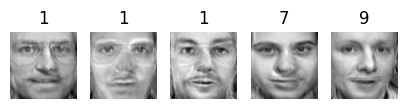

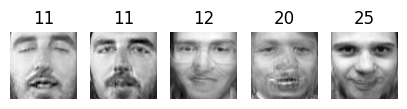

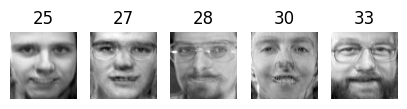

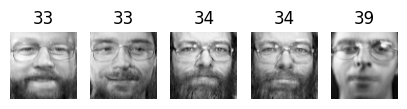

In [39]:
plot_faces(generated_faces[:5], generated_labels[:5])
plot_faces(generated_faces[5:10], generated_labels[5:10])
plot_faces(generated_faces[10:15], generated_labels[10:15])
plot_faces(generated_faces[15:20], generated_labels[15:20])

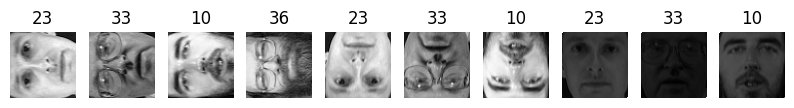

In [43]:
n_rotated: int = 4
rotated: NDArrayFloat = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated: NDArrayInt = y_train[:n_rotated]

n_flipped: int = 3
flipped: NDArrayFloat = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped: NDArrayInt = y_train[:n_flipped]

n_darkened: int = 3
darkened: NDArrayFloat = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.1
y_darkened: NDArrayInt = y_train[:n_darkened]

X_bad_faces: NDArrayFloat = np.r_[rotated, flipped, darkened]
y_bad: NDArrayInt = np.r_[y_rotated, y_flipped, y_darkened]

plot_faces(X_bad_faces, y_bad)

In [45]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [46]:
gmm.score_samples(X_bad_faces_pca)

array([-3.32988710e+07, -2.26063551e+07, -4.05591624e+07, -5.42562238e+07,
       -2.31066798e+07, -2.95471195e+07, -5.09517478e+07, -1.18529833e+08,
       -1.25709180e+08, -1.13925535e+08])

They are anomalies so there score is very less.

In [47]:
gmm.score_samples(X_train_pca[:10])

array([1389.31876604, 1384.33073769, 1384.05717411, 1420.50294715,
       1366.82370334, 1387.950476  , 1387.9504749 , 1369.03026764,
       1381.40879326, 1383.43133002])

# Exercise - 13
Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

In [50]:
def reconstruction_errors(pca: PCA, X: NDArray) -> NDArrayFloat:
    X_pca: NDArrayFloat = pca.transform(X)
    X_reconstructed: NDArrayFloat = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis= -1)   # axis= -1 => last axis
    return mse

In [52]:
reconstruction_errors(pca, X_train).mean()

0.00019049898

In [53]:
reconstruction_errors(pca, X_bad_faces).mean()

0.0051115686

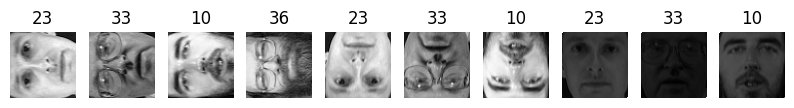

In [54]:
plot_faces(X_bad_faces, y_bad)

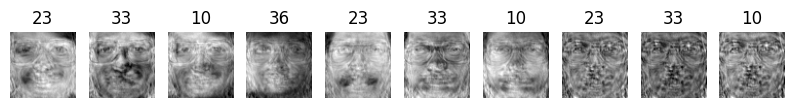

In [55]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)